# Model Selection 모듈 소개

## 학습/테스트 데이터 셋 분리 – train_test_split()

### 사이킷런 model_selection 모듈의 주요 기능
- 학습 데이터와 테스트 데이터 세트 분리
- 교차 검증 분할 및 평가
- Estimator의 하이퍼 파라미터 튜닝

**학습 데이터와 테스트 데이터 세트 분리**
- train_test_split() 함수 사용

**학습 데이터 세트**
- 머신러닝 알고리즘의 학습을 위해 사용
- 데이터의 속성(피처)과 결정값(레이블) 모두 포함
- 학습 데이터를 기반으로 머신러닝 알고리즘이 데이터 속성과 결정값의 패턴을 인지하고 학습

**테스트 데이터 세트** 
- 학습된 머신러닝 알고리즘 테스트용
- 머신러닝 알고리즘은 제공된 속성 데이터를 기반으로 결정값 예측
- 학습 데이터와 별도의 세트로 제공

**train_test_split() 함수**

train_test_split(feature_dataset, label_dataset, test_size, train_size, random_state, shuffle, stratify)


- feature_dataset : 피처 데이터 세트
    - 피처(feature)만으로 된 데이터(numpy) [5.1, 3.5, 1.4, 0.2],...
- label_dataset : 레이블 데이터 세트
    - 레이블(결정 값) 데이터(numpy) [0 0 0 ... 1 1 1 .... 2 2 2]
- label_dataset : 테스트 데이터 세트 비율
    - 전체 데이터 세트 중 테스트 데이터 세트 비율
    - 지정하지 않으면 0.25
- random_state : 세트를 섞을 때 해당 int 값을 보고 섞음
    - 수행할 때마다 동일한 데이터 세트로 분리하기 위해 시드값 고정(실습용)
    - 0 또는 4가 가장 많이 사용
    - 하이퍼 파라미터 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있음
    
- shuffle : 분할하기 전에 섞을지 지정
    - default=True (보통은 default 값으로 놔둠)
- stratify : 지정된 레이블의 클래스 비율에 맞게 분할
    - default=None
    - classification을 다룰 때 매우 중요한 옵션값
    - stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train/ validation에 유지해 줌(한 쪽에 쏠려서 분배되는 것을 방지)
    - 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있음
    
   
   
예. train_test_split(iris_data, iris_label, test_size=0.3, random_state=11)


train_test_split() 반환값
* X_train : 학습용 피처 데이터 세트 (feature)
* X_test : 테스트용 피처 데이터 세트 (feature)
* y_train : 학습용 레이블 데이터 세트 (target)
* y_test : 테스트용 레이블 데이터 세트 (target)
* feature : 대문자 X_
* label(target) : 소문자 y_

### (1) 학습/테스트 데이터 셋 분리하지 않고 예측

예측 정확도: 1.0


### (2) 학습/테스트 데이터 셋 분리하고 예측

## Data Split과 모델 검증

- 언제
    - "충분히 큰" 데이터 세트를 가용할 때
    - "충분히 큰" 데이터가 없을 때에는 교차 확인(Cross Validation) 고려
    

- 왜
    - 학습에 사용되지 않은 데이터를 사용하여 예측을 수행함으로써 모델의 일반적인 성능에 대한 적절한 예측을 함
    

- 어떻게
    - 홀드-아웃(Hold-out)
    - 교차검증(Cross Validation,CV)
    - 필요에 따라 Stratified Sampling

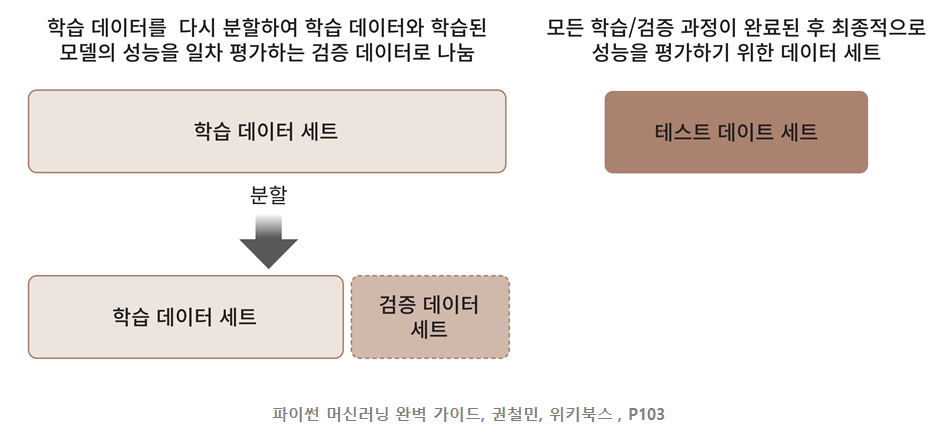

### 홀드-아웃 방식
- 데이터를 두 개 세트로 나누어 각각 Train과 Test 세트로 사용
- Train과 Test의 비율을 7:3 ~ 9:1로 널리 사용하나, 알고리즘의 특성 및 상황에 따라 적절한 비율을 사용
- Train – Validation - Test로 나누기도 함

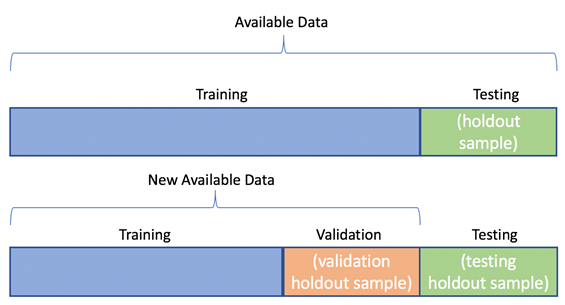
https://algotrading101.com/learn/train-test-split-2/


### 교차검증(Cross Validation, CV)


    

    
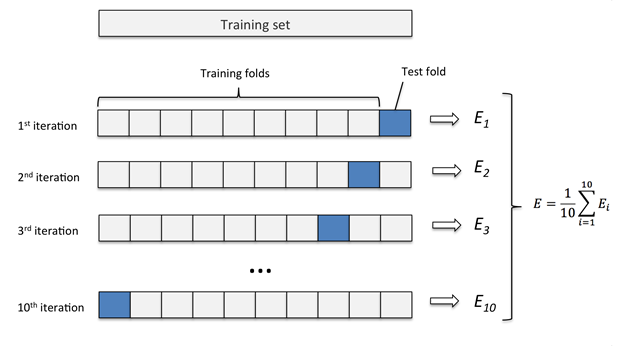


http://karlrosaen.com/ml/learning-log/2016-06-20/

### 교차 검증 방법
- K 폴드 교차 검증
- Stratified K 폴드 교차 검증

### K 폴드 교차 검증
- K개의 데이터 폴드 세트를 만들어서
- K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행
- 가장 보편적으로 사용되는 교차 검증 기법


- 5-폴드 교차 검증

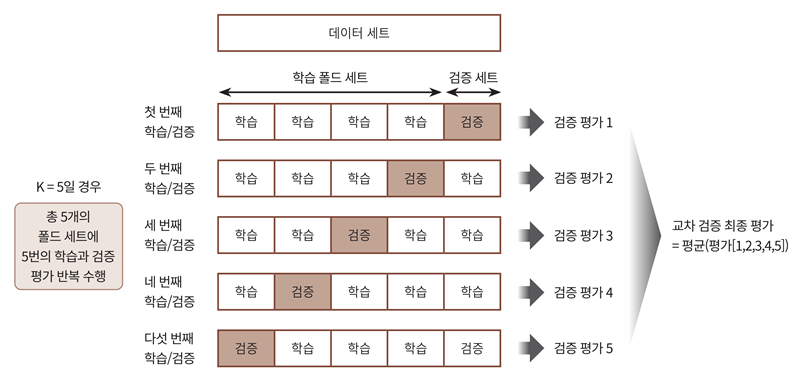

**K 폴드 교차 검증 프로세스 구현을 위한 사이킷런 클래스**

(1) KFold 클래스 : 폴드 세트로 분리하는 객체 생성
- kfold = KFold(n_splits=5)

(2) split() 메소드 : 폴드 데이터 세트로 분리
- kfold.split(features)
- 각 폴드마다  
    학습용, 검증용, 테스트 데이터 추출  
    학습용 및 예측 수행  
    정확도 측정  
    
(3) 최종 평균 정확도 계산

* K 폴드 예제

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

iris = load_iris()
features = iris.data
label = iris.target

print(features.shape) # 150개 데이터 피처 4개
print('붓꽃 데이터 세트 크기:',features.shape[0])

(150, 4)
붓꽃 데이터 세트 크기: 150


### Stratified K 폴드 교차 검증
- 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식

### 불균형한 데이터(imbalanced data) 문제
- 관심 대상 데이터가 상대적으로 매우 적은 비율로 나타나는 데이터 문제

- 분류 문제인 경우 : 클래스들이 균일하게 분포하지 않은 문제를 의미
    - 예. 불량률이 1%인 생산라인에서 양품과 불량품을 예측하는 문제
    - 사기감지탐지(fraud detection), 이상거래감지(anomaly detection), 의료진단(medical diagnosis) 등 에서 자주 나타남

- 회귀 문제인 경우 : 극단값이 포함되어 있는 "치우친" 데이터 사례
    - 예. 산불에 의한 피해 면적을 예측하는 문제
    (https://www.kaggle.com/aleksandradeis/regression-addressing-extreme-rare-cases)


**우회/극복하는 방법**
- 데이터 추가 확보


- Re-Sampling
    - Under-sampling(과소표집)
        - 다른 클래스에 비하여 상대적으로 많이 나타나는 클래스의 개수를 줄임
        - 균형은 유지할 수 있으나 유용한 정보에 대한 손실이 있을 수 있음
    - Over-Sampling(과대표집)
        - 상대적으로 적게 나타나는 클래스의 데이터를 복제하여 데이터의 개수를 늘림
        - 정보 손실은 없이 학습 성능은 높아지는 반면, 과적합의 위험이 있음
        - 이를 회피하기 위해서 SMOTE 와 같이 임의의 값을 생성하여 추가하는 방법 사용
        
        
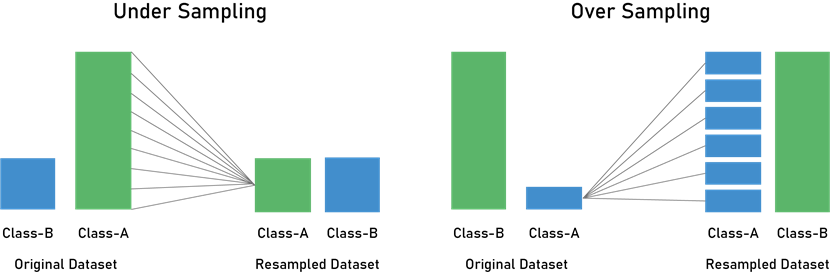    

### Stratified K 폴드 교차 검증
- 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
- 특정 레이블값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우친 경우
- 학습 데이터와 검증 데이터 세트가 가지는 레이블 분포도가 유사하도록 검증 데이터 추출
- 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배
- (stratify : 계층화하다)

- KFold로 분할된 레이블 데이터 세트가 
- 전체 레이블 값의 분포도를 반형하지 못하는 문제 해결

Stratified K 폴드 교차 검증 방법이 사용되는 예
- 대출 사기 데이터 예측 

- 데이터 세트 : 1억 건  
- feature 수십 개  
- 대출 사기 여부를 뜻하는 레이블   
   - 대출 사기 : 1  
   - 정상 대출 : 0  
- 대출 사기 건수 : 약 1000 건 (전체의 0.00001 %)  


StratifiedKFold 클래스

## 교차검증을 보다 간편하게 

- 교차 검증 (Cross Validation) 과정
    1. 폴드 세트 설정
    2. for 문에서 반복적으로 학습 및 검증 데이터 추출 및 학습과 예측 수행
    3. 폴드 세트별로 예측 성능을 평균하여 최종 성능 평가

### cross_val_score( ) 함수
- 1 ~ 3 단계의 교차 검증 과정을 한꺼번에 수행
- 내부에서 Estimator를 학습(fit), 예측(predict), 평가(evaluation) 시켜주므로
- 간단하게 교차 검증 수행 가능

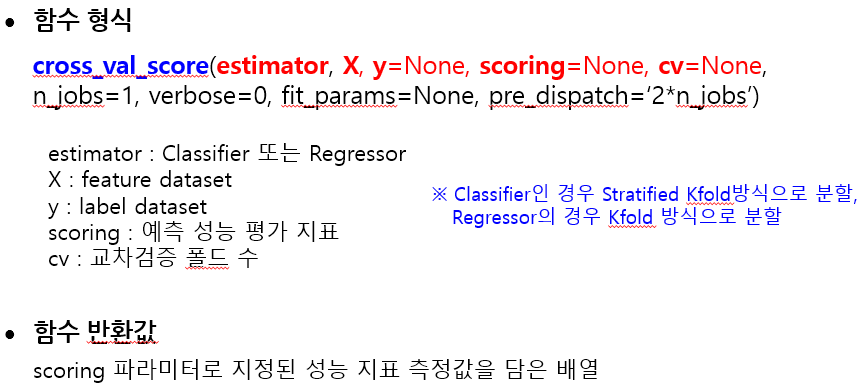

cross_val_score() 주요 파라미터  
cross_val_score(estimator, X, y, scoring, cv)

- estimator : Classifier 또는 Regressor (분류 또는 회귀)
- X : 피처 데이터 세트
- y : 레이블 데이터 세트
- scoring : 예측 성능 평가 지표 
- cv : 교차 검증 폴드 수

cross_val_score(dt_clf, data, label, scoring='accuracy‘, cv=3)

* cross_val_score()는 cv로 지정된 횟수만큼
* scoring 파라미터로 지정된 평가 지표로 평가 결과값을 배열로 반환
* 일반적으로 평가 결과값 평균을 평가 수치로 사용

### 붓꽃 자료를 3개 폴드로 분할하여 학습 및 검증

- cross_val_score()는 cv로 지정된 횟수만큼
- scoring 파라미터로 지정된 평가 지표로 평가 결과값을 배열로 반환
- 일반적으로 평가 결과값 평균을 평가 수치로 사용

## 교차 검증과 최적의 하이퍼파라미터 튜닝을 한번에

하이퍼 파라미터 (Hyper parameter)
- 모델링할 때 사용자가 직접 세팅해주는 값
- 여러 하이퍼 파라미터를 순차적으로 변경하면서  
- 최고 성능을 가지는 파라미터 조합을 찾을 수 있음
- max_depth, min_samples_split, iteration 등

- 머신러닝 알고리즘을 구성하는 주요 구성 요소로
- 이 값들을 조정해 알고리즘의 예측 성능을 개선할 수 있음

### 사이킷런의 GridSearchCV클래스

- Classifier나 Regressor와 같은 알고리즘에 사용되는
- 하이퍼 파라미터를 순차적으로 입력하면서
- 최적의 파라미터를 편리하게 도출할 수 있는 방법 제공  
-(Grid는 격자라는 의미 : 촘촘하게 파라미터를 입력하면서 테스트 하는 방식)

즉,  
- 머신러닝 알고리즘의 여러 하이퍼 파라미터를  
- 순차적으로 변경하면서 최고 성능을 가지는 파라미터를 찾고자 한다면  
- 파라미터의 집합을 만들어 순차적으로 적용하면서 최적화 수행  

**GridSearchCV 클래스 생성자의 주요 파라미터**

- estimator : classifier, regressor, peipeline


- param_grid : key + 리스트 값을 가지는 딕셔너리 (estimator 튜닝을 위한 하이퍼 파라미터 )
     - key: 파라미터명, 리스트값:파라미터 값
     
     
- scoring : 예측 성능을 측정할 평가 방법 
     - 성능 평가 지표를 지정하는 문자열
     - 예: 정확도인 경우 'accuracy'
     
     
- cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수


- refit : 최적의 하이퍼 파라미터를 찾은 뒤 
        - 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습 여부
     - 디폴트 : True    


min_samples_split : 자식 규칙 노드를 분할해서 만드는데 필요한 최소 샘플 데이터 개수
- min_samples_split=4로 설정하는 경우
    - 최소 샘플 개수가 4개 필요한데
    - 3개만 있는 경우에는 더 이상 자식 규칙 노드를 위한 분할을 하지 않음


트리 깊이도 줄어서 더 간결한 결정 트리 생성


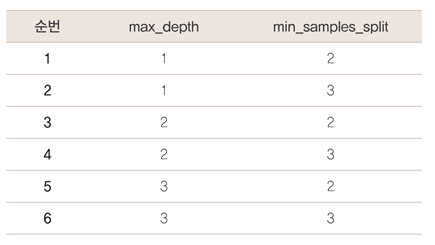

**일반적인 머신러닝 모델 적용 방법**

- 일반적으로 학습 데이터를 GridSearchCV를 이용해
- 최적 하이퍼 파라미터 튜닝을 수행한 뒤에
- 별도의 테스트 세트에서 이를 평가하는 방식